In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
import torch as tr
from torch import nn
from torch.nn.modules import loss as nn_loss
from torch import optim
from torch.nn import functional as F
from torch.nn import init

In [3]:
from dataloaders.factory import DataLoaderFactory

In [4]:
from hyperparams import base
from exp_context import ExperimentContext

### **Hyper parameters**

In [5]:
class Hyperparams(base.Hyperparams):
    dtype = tr.float32

    batch_size = 64
    logit_batch_size = 32

    input_size = 2

    z_size = 2

    lr_autoencoder = 0.0001
    lr_decoder = 0.0001
    lr_disc = 0.0001

    z_dist_type = 'uniform'  # ['uniform', 'normal', 'sphere']

    z_bounds = 4.0

    show_visual_while_training = True

    train_generator_adv = True
    train_autoencoder = True

    train_batch_logits = True
    train_sample_logits = True

    dataloader = 'four_gaussian_sym'

    model = 'bcgan'
    exp_name = 'exp1'

### __Experiment Context__

In [6]:
ExperimentContext.set_context(Hyperparams)
H = ExperimentContext.Hyperparams

from models.toy.nets import ToyGAN
from models.toy.gantree import GNode
from trainers.gan_trainer import GanTrainer

### __Model, DataLoader and Trainer Creation__

In [7]:
gan = ToyGAN('gan')
dl = DataLoaderFactory.get_dataloader('four_gaussian_sym', H.input_size, H.z_size, H.batch_size, H.batch_size)
trainer = GanTrainer(data_loader=dl, model=gan, n_iterations=1000)

### __Training Algorithm__

In [8]:
trainer.train()

Step 100
Gen  Accuracy: 14.0625
Disc Accuracy: 76.5625
Step 200
Gen  Accuracy: 43.75
Disc Accuracy: 35.9375
Step 300
Gen  Accuracy: 6.25
Disc Accuracy: 75.0
Step 400
Gen  Accuracy: 20.3125
Disc Accuracy: 42.1875
Step 500
Gen  Accuracy: 0.0
Disc Accuracy: 50.0
Step 600
Gen  Accuracy: 0.0
Disc Accuracy: 53.90625
Step 700
Gen  Accuracy: 6.25
Disc Accuracy: 46.875
Step 800
Gen  Accuracy: 0.0
Disc Accuracy: 50.0
Step 900
Gen  Accuracy: 32.8125
Disc Accuracy: 50.78125
Step 1000
Gen  Accuracy: 0.0
Disc Accuracy: 50.0


In [16]:
gan.classify()

TypeError: classify() takes exactly 2 arguments (1 given)

In [33]:
tr.save(gan.state_dict(), 'gan.pt')

In [56]:
means = tr.Tensor([0.0, 0.0])
cov = tr.Tensor([[1.0, 0.7],
                 [0.7, 1.0]])


In [57]:
X = f.sample(tr.Size([1000])).numpy()

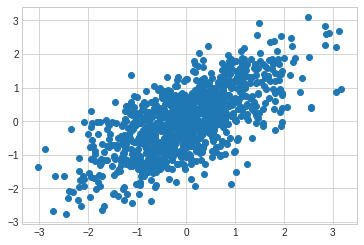

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(plt.style.available[14])
plt.scatter(X[:, 0], X[:, 1])

In [50]:
f.log_prob(tr.Tensor([1,1]))

tensor(-2.0894)

In [51]:
def x_clf_loss(x1, x2, means1, means2, cov1, cov2):
    f1 = tr.distributions.MultivariateNormal(means1, cov1)
    f2 = tr.distributions.MultivariateNormal(means2, cov2)
    
    loss = (f1.log_prob(x1) - f2.log_prob(x1)).mean() + (f2.log_prob(x2) - f1.log_prob(x2)).mean()
    
    loss.backward()
    
    # complete the rest

In [60]:
from models import losses

In [94]:
logits = tr.rand(100, 1)
labels = tr.zeros(100, 1)
print logits.shape, labels.shape
# losses.sigmoid_cross_entropy_loss(logits, labels)

torch.Size([100, 1]) torch.Size([100, 1])


In [22]:
(tr.rand(100) < 0.5).type(tr.FloatTensor).mean()

tensor(0.5400)

In [19]:
tr.Tensor([1,2, 3])

tensor(2.)

In [ ]:
tr.FloatTensor